# Machine Learning

## Session #8: Hidden Markov Models for stock data analysis

This notebook is based on the notebook [``plot_hmm_stock_analysis.ipynb``](http://hmmlearn.readthedocs.org/en/stable/auto_examples/plot_hmm_stock_analysis.html#sphx-glr-auto-examples-plot-hmm-stock-analysis-py) of [hmmlearn](http://hmmlearn.readthedocs.org/en/stable/index.html) and [``date_demo1.py``](http://matplotlib.org/examples/pylab_examples/date_demo1.html) of [matplotlib](http://matplotlib.org/index.html).

The iPython Notebook should be send by email as s8_HMM_firstname_familyname.ipynb

### 1. Yahoo! stock market time series

This script load a time series containing the stock price data from Yahoo! finance and shows how to use Gaussian HMM on it

In [1]:
%matplotlib inline
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


print(__doc__)

quotes = quotes_historical_yahoo_ochl(
    "INTC", datetime.date(1995, 1, 1), datetime.date(2015, 1, 6))

# Unpack quotes
dates = np.array([q[0] for q in quotes], dtype=int)
close_v = np.array([q[2] for q in quotes])
volume = np.array([q[5] for q in quotes])[1:]

# Take diff of close value. Note that this makes
# ``len(diff) = len(close_t) - 1``, therefore, other quantities also
# need to be shifted by 1.
diff = np.diff(close_v)
dates = dates[1:]
close_v = close_v[1:]

# Pack diff and volume for training.
X = np.column_stack([diff, volume])

Automatically created module for IPython interactive environment


Run Gaussian HMM


In [20]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...done


Print trained parameters and plot


Transition matrix
[[  9.14674834e-01   1.64473022e-02   2.47289953e-06   6.88753905e-02]
 [  1.19088813e-02   8.87185333e-01   9.62673103e-02   4.63847506e-03]
 [  2.83704339e-03   2.16968514e-01   7.71109508e-01   9.08493494e-03]
 [  1.38607800e-01   2.03752474e-02   3.82079637e-02   8.02808989e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  8.98152130e-03   3.54023029e+07]
var =  [  1.47427355e-01   1.09472020e+14]

1th hidden state
mean =  [  4.59780315e-03   5.69517241e+07]
var =  [  6.97158631e-02   1.52672372e+14]

2th hidden state
mean =  [  2.79928571e-02   9.56106550e+07]
var =  [  1.45858859e-01   8.82189335e+14]

3th hidden state
mean =  [ -3.77739322e-02   7.25030459e+07]
var =  [  1.87522242e+00   2.51289578e+15]



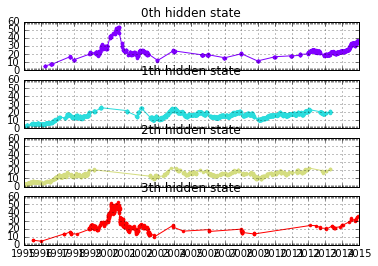

In [21]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

### 2. Explaining the model

Provide an explanation on the meaning of the hidden states and the parameters of the model (transition probability matrix and emission probabilities)

The 0th a 3th reflect the volatility of the time series. The 0th hidden state represents a jump, and the 3th represents the slump. The 1th and the 2th hidden state represent the stable period.

The transition matrix shows us that high fluctuations are probable given that we had a jump. If we have a jump it is most probable to have a slump after (0th state to 1th is likely, whereas 0th to 1th is more likely).

According to the emmision probabilities the means of the 0th through the 2th hidden state are similar. The 3th hidden state is the one with the slump, and it has a negative mean.

### 3. Changing the model parameters

* Change the number of hidden states, from 2 to 6, calculate the likelihood of each model, and try to repeat the above explanations
* With 4 hidden states, change the number of initizalizations to 1 and evaluate the likelihood of the model in 10 runs of the EM algorithm


In [3]:
from hmmlearn.hmm import GaussianHMM
hidden_states = [2,3,4,5,6]
for hidden_state in hidden_states:
    model = GaussianHMM(n_components=hidden_state, covariance_type="diag", n_iter=1000).fit(X)
    score = model.score(X)
    print("%dth hidden state, probability: %f" % (hidden_state, score))

for i in range(10):
    model = GaussianHMM(n_components=4, covariance_type="diag", random_state=i, n_iter=1000).fit(X)
    score = model.score(X)
    print("%dth iteration, probablitiy: %f" % (i, score))


2th hidden state, probability: -95737.296416
3th hidden state, probability: -94858.495635
4th hidden state, probability: -94337.049928
5th hidden state, probability: -93690.893944
6th hidden state, probability: -93435.956766
0th iteration, probablitiy: -94337.049435
1th iteration, probablitiy: -94337.049434
2th iteration, probablitiy: -94337.049981
3th iteration, probablitiy: -94337.049435
4th iteration, probablitiy: -94337.057827
5th iteration, probablitiy: -94337.049888
6th iteration, probablitiy: -94337.049434
7th iteration, probablitiy: -94337.049435
8th iteration, probablitiy: -94337.049435
9th iteration, probablitiy: -94333.921108


### 3. Changing the model

Change the emission probability to a GMM, and repeat #2 varying the number of component from 1 to 3 and the number of hidden states from 2 to 5

In [4]:
from hmmlearn.hmm import GMMHMM
components = [1,2,3]
hidden_states = [2,3,4,5]
for component in components:
    for hidden_state in hidden_states:
        model = GMMHMM(n_components=hidden_state, n_mix=component, covariance_type="diag", n_iter=1000).fit(X)
        
        score = model.score(X)
        print("%dth component, %dth hidden state, probablity: %f" %(component, hidden_state, score))

1th component, 2th hidden state, probablity: -98018.902523
1th component, 3th hidden state, probablity: -98018.902524
1th component, 4th hidden state, probablity: -98018.902524
1th component, 5th hidden state, probablity: -98018.902525
2th component, 2th hidden state, probablity: -96082.638327
2th component, 3th hidden state, probablity: -94773.889439
2th component, 4th hidden state, probablity: -94773.891259
2th component, 5th hidden state, probablity: -94773.883510
3th component, 2th hidden state, probablity: -94299.726693
3th component, 3th hidden state, probablity: -93701.574688
3th component, 4th hidden state, probablity: -93448.979336
3th component, 5th hidden state, probablity: -93063.440342


/home/sejaszini/anaconda2/lib/python2.7/site-packages/hmmlearn-0.2.1-py2.7-linux-x86_64.egg/hmmlearn/hmm.py:593: RuntimeWarning: divide by zero encountered in log
